# Medium Earnings Analysis  

This project tracks and analyzes my Medium Partner Program earnings and engagement over time. The dataset is manually recorded each month and does **not** use any APIs or automated data extraction methods.  

## 📊 About the Dataset  

The data consists of key Medium writing business metrics, including:  

- **earnings**: Total revenue earned from Medium each month  
- **followers**: Total number of accumulated followers  
- **follower_gain (change)**: Net increase or decrease in followers per month
- **email_subscribers**: Number of email subscribers per month
- **views**: Total article views per month
- **reads**: Total article reads per month 
- **number_articles**: Number of articles published each month
- **avg_earnings_per_article**: (`earnings / number_articles`)  
- **avg_read_ratio**: (`reads / views`)
- **average_article_length(minutes)**: Total number of articles written per month divided by the read time (in minutes) of each story
- **views_reads_discrepency**: `views` - `reads`  

### **⚠️ Data Collection Method**  
This dataset is **manually recorded** by me each month. No APIs, scraping, or automated extraction methods were used. While not the most efficient approach in a developer or work environment, the dataset is small, and tracking it only takes about **5 minutes per month**. Moving forward, I plan to continue this manual tracking method.  

## 🚀 Goals  

- **Analyze earnings trends** over time  
- **Explore engagement metrics** to identify patterns  
- **Create visualizations** to track progress  

## 📌 Future Enhancements  

- Potentially explore **basic machine learning models** to predict earnings  
- Develop a **dashboard** for real-time tracking  

---
🚀🚀🚀🚀🚀


1. Exploratory Data Analysis (EDA)
1.1 Hypotheses to Test

    Do more followers lead to higher earnings? (Correlation between followers and earnings)Does engagement (views & reads) have a stronger impact on earnings than follower count?
    Is there a seasonal trend in earnings? (Earnings higher or lower in certain months?)
    Did personal distractions (dating, emotional turmoil) negatively impact earnings?
    Did major insights about relationships contribute to higher earnings later on?

1.2 Correlation Analysis

    Heatmap to show relationships between earnings, views, reads, followers, etc.

1.3 Earnings Over Time

    Line plot of earnings from 2023 to the current month
    Highlight key events affecting earnings (struggles, major insights, platform trends)

1.4 Rolling Change in Earnings

    Calculate month-over-month percentage change
    Rolling average for trend smoothing

1.5 Visualizing Earnings Growth

    Line plot of rolling earnings change

1. Predictive Modeling & Forecasting
2.1 Machine Learning for Earnings Prediction

    Selecting features (views, reads, followers, etc.)
    Testing regression models (Linear Regression, Random Forest, XGBoost)
    Evaluating model performance

2.2 Earnings Forecasting

    Time series modeling (ARIMA, Prophet, or LSTM)
    Plot forecasted earnings for the next few months

3. Conclusion & Insights

    Summary of findings
    Key takeaways from personal and platform-related trends
    Answering hypotheses based on data
    Next steps for improving earnings




In [1]:
import pandas as pd
import numpy as np
from IPython import display
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter, PercentFormatter

##from statsmodels.tsa.seasonal import seasonal_decompose
##from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
import datetime as dt
import matplotlib.dates as mdates

In [2]:
# Read the raw data from csv format
dataframe = pd.read_csv("medium_data.csv").set_index(["year", "month"])

### 1. Exploratory Data Analysis (EDA)

The dataframe isn't large because there are only about 20 months worth of data, so I'm not going to bother using `.head()` or `.tail` methods.

 * Do more followers lead to higher earnings? (Correlation between followers and earnings)
 * Does engagement (views & reads) have a stronger impact on earnings than follower count?
 * Is there a seasonal trend in earnings? (Earnings higher or lower in certain months?)
 * Did personal distractions (dating, emotional turmoil) negatively impact earnings?
 * Did major insights about relationships contribute to higher earnings later on?


In [3]:
# display the dataframe
dataframe

earnings  followers  follower_gain(change)  email_subscribers  \
year month                                                                      
2023 January         NaN        NaN                    NaN                NaN   
     February        NaN        NaN                    NaN                NaN   
     March           NaN        NaN                    NaN                NaN   
     April           NaN        NaN                    NaN                NaN   
     May             NaN        NaN                    NaN                NaN   
     June            NaN        2.0                    2.0                NaN   
     July            NaN       48.0                   46.0                NaN   
     August        14.25       81.0                   33.0                NaN   
     September     10.71      108.0                   27.0                NaN   
     October        2.04      137.0                   29.0                3.0   
     November      15.48      178.0                   41.0                3.0   
     December     159.91      244.0                   66.0                5.0   
2024 January      103.26      309.0                   65.0                3.0   
     February      39.82      358.0                   49.0                4.0   
     March         74.53      384.0                   26.0                5.0   
     April        206.51      472.0                   88.0                9.0   
     May          152.47      539.0                   67.0               11.0   
     June         196.38      643.0                  104.0               15.0   
     July         319.06      841.0                  198.0               19.0   
     August       413.91     1048.0                  207.0               21.0   
     September    676.92     1388.0                  340.0               27.0   
     October      463.29     1610.0                  230.0               30.0   
     November     435.48     1762.0                  172.0               29.0   
     December     298.96     1906.0                  144.0               31.0   
2025 January      273.17     1975.0                   89.0               29.0   
     February     418.94     2071.0                   96.0               30.0   
     March        416.54     2140.0                   78.0               30.0   
     April           NaN        NaN                    NaN                NaN   
     May             NaN        NaN                    NaN                NaN   
     June            NaN        NaN                    NaN                NaN   
     July            NaN        NaN                    NaN                NaN   
     August          NaN        NaN                    NaN                NaN   
     September       NaN        NaN                    NaN                NaN   
     October         NaN        NaN                    NaN                NaN   
     November        NaN        NaN                    NaN                NaN   
     December        NaN        NaN                    NaN                NaN   

                  views    reads  number_articles  avg_earnings_per_article  \
year month                                                                    
2023 January        NaN      NaN              NaN                       NaN   
     February       NaN      NaN              NaN                       NaN   
     March          NaN      NaN              NaN                       NaN   
     April          NaN      NaN              NaN                       NaN   
     May            NaN      NaN              NaN                       NaN   
     June           NaN      NaN              NaN                       NaN   
     July         122.0     60.0              4.0                       NaN   
     August       181.0     83.0             11.0                      1.30   
     September    146.0     80.0             13.0                      0.82   
     October       91.0     46.0             13.0                   

Quick note about this dataset:
It's not complete yet, because as of doing this analysis, we're still in 2025, so there will be rows that remain unfilled (for now).

For 2023:
I think I remember starting actual writing on Medium in May to June.
So everything before that is empty. No data. Nothing to track.

In June and July I started accumulating followers, but no earnings. I can't remember if at the time Medium was still limiting writers from earning income until they had 100 followers or not. But in August, I earned my first $14.25 cents.


In [4]:
# This is just a quick summary of the data

dataframe.describe().round(2) # <--- all the trailing zeros are hard to read so I rounded to 2 decimal points

,earnings,followers,follower_gain(change),email_subscribers,views,reads,number_articles,avg_earnings_per_article,avg_read_ratio,average_article_length(minutes),views_reads_discrepency
count,20.00,22.00,22.00,18.00,21.00,21.00,21.00,20.00,21.00,20.00,21.00
mean,234.58,829.27,99.86,16.89,7820.33,5451.90,16.67,12.20,65.95,5.70,2368.43
std,191.46,760.02,83.34,11.53,6982.65,4924.39,5.72,8.96,8.32,0.96,2077.64
min,2.04,2.00,2.00,3.00,91.00,46.00,4.00,0.16,45.86,4.16,45.00
25%,65.85,194.50,42.25,5.00,1200.00,863.00,13.00,3.96,66.67,4.92,337.00
50%,201.44,505.50,72.50,17.00,5300.00,4000.00,15.00,11.88,68.42,5.97,1500.00
75%,414.57,1554.50,134.00,29.00,13200.00,9000.00,21.00,17.47,70.43,6.37,4200.00
max,676.92,2140.00,340.00,31.00,22000.00,16200.00,26.00,27.93,75.47,7.12,5800.00


It looks like I made an error in the data.
`avg_earnings_per_article` is way off. If you notice the max value, it is around $2,792.93. If only!
I'll have to fix it. What probably happened is I made an error in the way I wrote the expression for calculating the averages.

In this case, the easiest thing to do is go back to `01_data_merging.ipynb` and fix it there.
Re-run the code in that notebook, and overwrite the newly created dataframe back to a csv called `medium_data.csv`.

### 1.2 Correlation Analysis

    Heatmap to show relationships between earnings, views, reads, followers, etc.

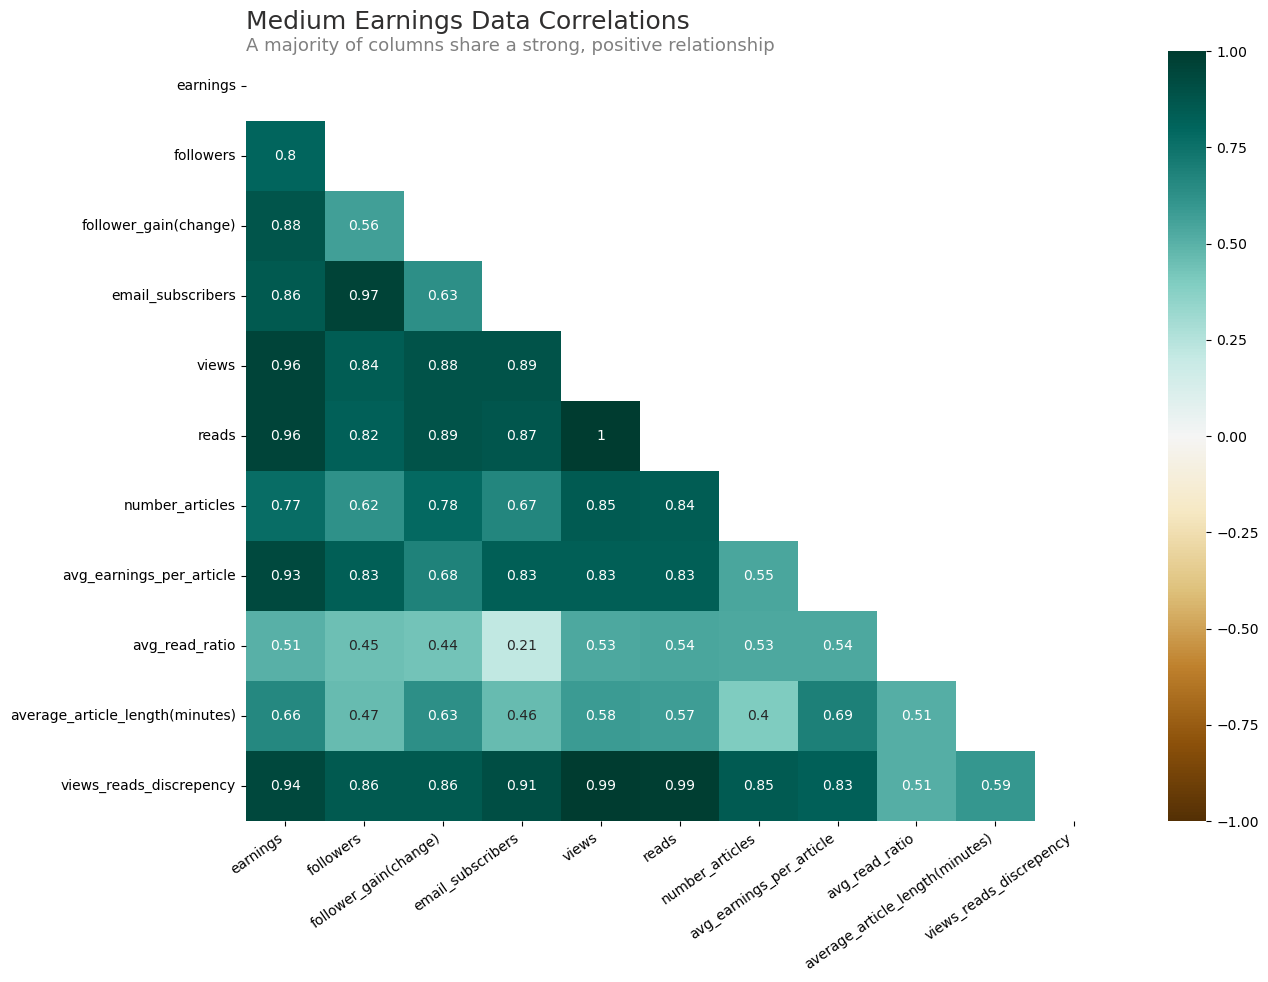

In [5]:

plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(dataframe.corr(), dtype=bool))

heatmap = sns.heatmap(dataframe.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title("Medium Earnings Data Correlations", fontdict={'fontsize':18}, pad=16, loc = "left", color = "#302f2f")
plt.text(x = 0, y = 0, s = "A majority of columns share a strong, positive relationship ", size = 13, color = "grey",)
plt.xticks(rotation = 35, ha = "right")
plt.show()



### At first glance:
1. Earnings has the strongest correlation `reads`--Not surprising; nothing really new here. To earn royalties, people have to read your articles.
2. Earnings and average read ration is the lowest (0.51).
3. The number of followers you have has a strong correlation, but one of the weakest correlations after average read ratio.
4. How many people read your articles per month is strongly correlated to the number of articles you publish per month. Which is obviously a given in most forms of content creation. (e.g., at what point does publishing more frequently not lead to a proportional increase in reads?).
5. Interestingly, `follower_gain(change)` has a stronger correlation with earnings than `followers`. A scatter plot of `follower_gain` vs. `earnings` might show if there’s a clear pattern.

Followers vs. follower gain – It makes sense that gaining new followers correlates more with earnings than total followers, as newer followers are often more engaged. It might be worth checking if follower gain is linked to article frequency or specific viral moments.

Gaining more followers tends to align with higher earnings (but does not necessarily cause it).

follower_gain(change) is a more dynamic feature, and its relationship with other factors could reveal interesting patterns.
I want to dig a little bit deeper and avoid looking at correlations between features that will just have us end up going in cirlces, like `reads` or `views`. Because remember, correlation does not equal causation.
#### `follower_gain(change)`:
What stands out the most to me is `number_articles`: how many articles I publish in one month. There is a 0.78 positive correlation.

writing more articles directly leads to more opportunities for engagement, even if the correlation isn’t the highest. Some reasons why number_articles might be the real driving factor:

Causality vs. Correlation – While reads and earnings are highly correlated, they depend on people having something to read in the first place. More articles = more exposure.
Compounding Effect – Older articles continue to generate reads and earnings, meaning past writing affects future months. A single month of high number_articles could boost long-term earnings in ways that aren’t immediately obvious.
Diminishing Returns? – Is there a point where writing more articles per month doesn’t yield as much growth? Testing this would be insightful.

Potential Analysis:

Lag Analysis: Does number_articles in Month X predict reads and earnings in Month X+1?
Threshold Effect: Is there a point where writing more articles stops increasing earnings (e.g., after 10 per month)?
Compounding vs. Instant Impact: Do old articles contribute more to current earnings than new ones?


What stands out the most to me is `number_articles`: how many articles I publish in one month. There is a 0.78 positive correlation.

writing more articles directly leads to more opportunities for engagement, even if the correlation isn’t the highest. Some reasons why number_articles might be the real driving factor:

Causality vs. Correlation – While reads and earnings are highly correlated, they depend on people having something to read in the first place. More articles = more exposure.
Compounding Effect – Older articles continue to generate reads and earnings, meaning past writing affects future months. A single month of high number_articles could boost long-term earnings in ways that aren’t immediately obvious.
Diminishing Returns? – Is there a point where writing more articles per month doesn’t yield as much growth? Testing this would be insightful.

Potential Analysis:

Lag Analysis: Does number_articles in Month X predict reads and earnings in Month X+1?
Threshold Effect: Is there a point where writing more articles stops increasing earnings (e.g., after 10 per month)?
Compounding vs. Instant Impact: Do old articles contribute more to current earnings than new ones?


### `average_article_length(minutes)`

`average_article_length(minutes)` has a strong correlation with `avg_earnings_per_article`, but that's already a given.

This feature midly correlates with:
* `avg_read_ratio`
* `number_articles`
* `reads`
* `views`

These are common sense things. Surface level observations that do not warrant too much consideration, because
we can already rule out minimal causation.

However...

Noteworthy features that have an above average correlation that aren't so obvious:
* `follower_gain(change)` (0.65)

I want to maximize earnings as much as possible. So here's what I'm seeing:

   1. `follower_gain(change)` & `number_articles` influence monthly **earnings**
   2. `average_article_length(minutes)` has an above average correlation with `follower_gain(change)`



In [6]:
sns.set_theme(style="white", palette=None, font="Arial")

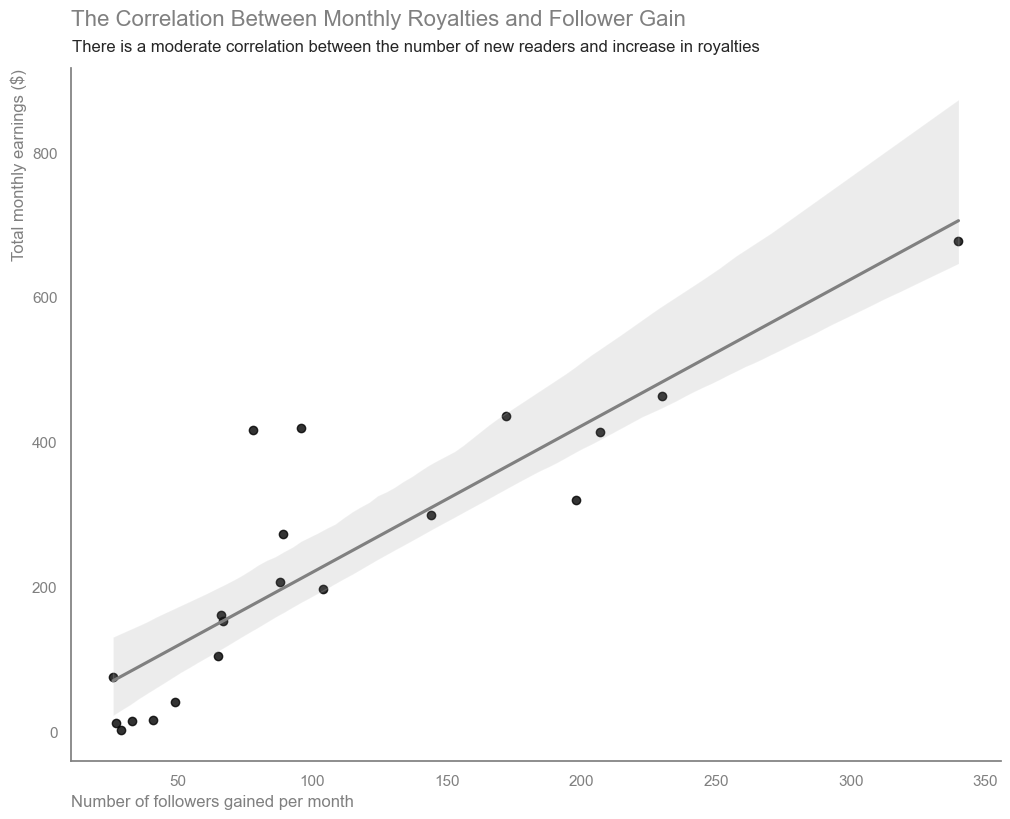

In [7]:
# Scatter plot
fig, ax = plt.subplots(figsize = (12,9))
g = sns.regplot(
    data=dataframe, 
    x="follower_gain(change)", 
    y="earnings", 
    line_kws={"color": "grey"}, 
    scatter_kws={"color": "black"}
    )
sns.despine()

for spine in ax.spines.values(): # set color of spines
    spine.set_color("grey")

# Change x-axis tick color
ax.tick_params(axis='x', colors='grey')

# Change y-axis tick color
ax.tick_params(axis='y', colors='grey')

plt.xlabel(
    "Number of followers gained per month", 
    loc = "left", 
    fontsize=12, 
    color = "grey"
    )

plt.ylabel("Total monthly earnings ($)", 
           loc="top", 
           fontsize=12, 
           color = "grey"
           )

plt.title(
    "The Correlation Between Monthly Royalties and Follower Gain", 
    fontsize=16, 
    color = "grey", 
    loc="left", 
    y=1.05)

plt.suptitle(
    "There is a moderate correlation between the number of new readers and increase in royalties", 
    y = 0.912, 
    x = 0.413, 
    size = 12
    )

plt.show()

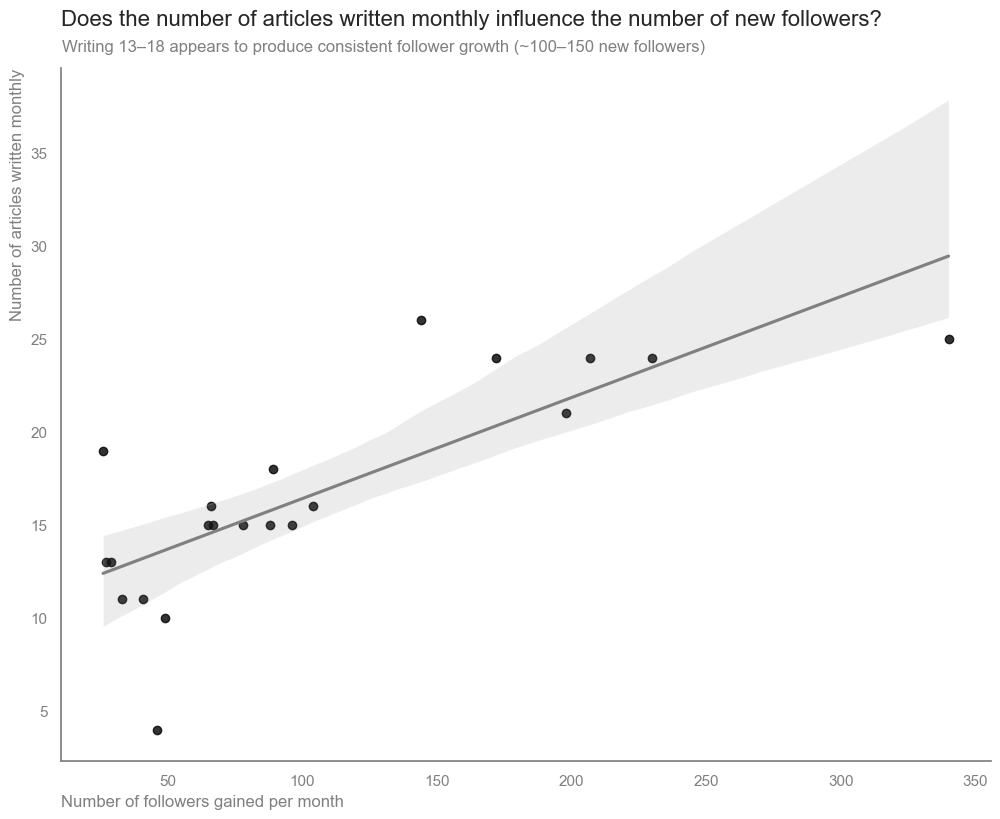

In [8]:
# Scatter plot
fig, ax = plt.subplots(figsize = (12,9))
g = sns.regplot(data=dataframe, x="follower_gain(change)", y="number_articles", line_kws={"color": "grey"}, scatter_kws={"color": "black"})
sns.despine()

for spine in ax.spines.values(): # set color of spines
    spine.set_color("grey")

# Change x-axis tick color
ax.tick_params(axis='x', colors='grey')

# Change y-axis tick color
ax.tick_params(axis='y', colors='grey')

plt.xlabel("Number of followers gained per month", loc = "left", fontsize=12, color = "grey")
plt.ylabel("Number of articles written monthly", loc="top", fontsize=12, color = "grey")

plt.title("Does the number of articles written monthly influence the number of new followers?", fontsize=16, loc="left", y=1.05)
plt.suptitle("Writing 13–18 appears to produce consistent follower growth (~100–150 new followers)", y = 0.912, x = 0.394, size = 12, color="grey")

# # Removes beginning and trailing whitespace
# ax.margins(x=0)

plt.show()

### Later on we can try to show distinct clusters with a different color

It almost looks like there are two distinct groups.
1. Cluster of points where you'll see about 100 followers gained per month with 15 to 18 articles written.
2. Another cluster of data points where writing 18 to 25 articles per month yields 200+ followers gained. (But this cluster is more sparse)

### Threshold Effect:

Writing 13–18 articles per month seems to produce consistent follower growth (~100–150 new followers). Writing 18+ articles per month has a wider range of outcomes (~200–300 followers gained), which could mean that higher output increases variance—some months perform really well, while others don't.

Realistically I'd need more data to make a better judgment from this, but at the moment 15 to 18 articles per month is already a lot of work.
    
Plus, delivering that many articles (18+) is time-consuming, and difficult to maintain long-term while retaining quality content. Yes, producing more will increase your odds of a viral post, but personally, I've seen consistency and quality pays off more than trying to push as much content as possible.

### Diminishing or Nonlinear Returns:

Which means there might be a sweet spot where 13–18  monthly maintains a steady, predictable return.
Writing more than 18+ articles could lead to more volatile results—some articles go viral, leading to big spikes, while others don’t.

### Algorithmic or Audience Fatigue:

Medium’s algorithm could be favoring writers who publish consistently but not excessively.
Writing too much might dilute engagement per article, leading to unpredictable results.

### Engagement Quality vs. Quantity Tradeoff:

If you write more than 18+ articles per month, maybe some of them aren’t getting enough attention, leading to uneven follower growth. Especially email subscribers, they might get annoyed by getting daily articles when they haven't even had time to catch up on the last one you wrote.

**Whereas 13–18 articles might be enough to maintain quality, consistent high earnings and steady engagement.**


### Group by
I want to group by the year and get a feel for our averages. 

In [9]:
# Write out a list in order to filter out what's necessary
dataframe.groupby("year").mean().round(2)[
    [
        "earnings", 
        "follower_gain(change)", 
        "email_subscribers",
        "views",
        "reads",
        "avg_earnings_per_article"
        ]
        ]

,earnings,follower_gain(change),email_subscribers,views,reads,avg_earnings_per_article
year,,,,,,
2023,40.48,34.86,3.67,1037.83,754.50,2.74
2024,281.72,140.83,17.00,10141.67,7080.25,13.29
2025,369.55,87.67,29.67,12100.00,8333.33,23.62


1. On average, earnings have risen since 2023.
2. Though,  `follower gain(change)` has (on average) fallen by about 30% to 35% from 2024 to 2025.
3. One of the flaws with the `avg_earnings_per_article` is the 80/20 rule (Pareto principle). A small percentage of my articles generate the majority of my revenue. Because of this, the average earnings per article is misleading since high-performing articles pull the average up, masking the fact that many articles earn little to nothing.

(But it's at least good to know that my articles are "on average" on a positive trend)

### 1.3 Earnings Over Time

* Line plot of earnings from 2023 to the current month
* Highlight key personal events affecting earnings (relationship struggles, major insights, platform trends)

In [10]:

df_plot = dataframe.copy() # use this new dataframe for plotting date and time
df_plot = df_plot.reset_index()  # Convert multi-index (year, month) to columns


In [11]:
df_plot.head()

,year,month,earnings,followers,follower_gain(change),email_subscribers,views,reads,number_articles,avg_earnings_per_article,avg_read_ratio,average_article_length(minutes),views_reads_discrepency
0,2023,January,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,February,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023,March,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023,April,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023,May,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_plot["date"] = pd.to_datetime(df_plot["year"].astype(str) + " " + df_plot["month"], format="%Y %B") # + pd.offsets.MonthEnd(1)
df_plot.head()

,year,month,earnings,followers,follower_gain(change),email_subscribers,views,reads,number_articles,avg_earnings_per_article,avg_read_ratio,average_article_length(minutes),views_reads_discrepency,date
0,2023,January,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01
1,2023,February,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-01
2,2023,March,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-01
3,2023,April,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-01
4,2023,May,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-01


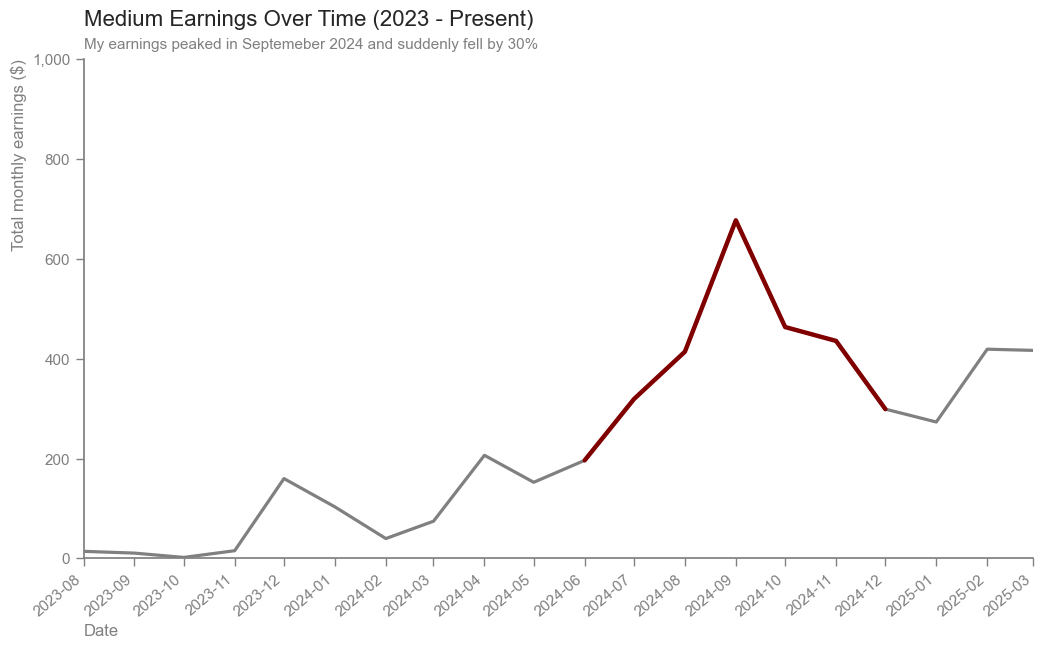

In [24]:
# Create the base relplot
g = sns.relplot(
    data=df_plot, 
    x="date", 
    y="earnings", 
    kind="line", 
    linewidth=2.3, 
    color="grey"
)

# Get axis from FacetGrid
ax = g.ax

# Adjust size
g.figure.set_size_inches(12, 6)

# Set monthly ticks and format
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=40, ha="right")

# Y-axis settings
ax.set_ylim(0, 1000)
ax.tick_params(axis="x", colors="grey", width=1)
ax.tick_params(axis="y", colors="grey", width=1)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Axis spine color
for spine in ax.spines.values():
    spine.set_color("grey")

# Titles & labels
plt.title("Medium Earnings Over Time (2023 - Present)", loc="left", size=16, y=1.05)
plt.xlabel("Date", loc="left",color="grey")
plt.ylabel("Total monthly earnings ($)", loc="top", color="grey")
plt.suptitle("My earnings peaked in Septemeber 2024 and suddenly fell by 30%", y = 1, x = 0.344, size = 11, color="grey")

# Remove whitespace
ax.margins(x=0)

# === HIGHLIGHT SEGMENT ON SAME AXIS ===
highlight = df_plot[
    (df_plot["date"] >= "2024-06-01") & 
    (df_plot["date"] <= "2024-12-01")
]

sns.lineplot(
    data=highlight,
    x="date",
    y="earnings",
    ax=ax,               # <- THIS is the key to plot on the same chart
    color="maroon",
    linewidth=3.2,
)

# Turn on the ticks for both x and y axes
ax.tick_params(axis='both', which='both', bottom=True, left=True)


plt.show()

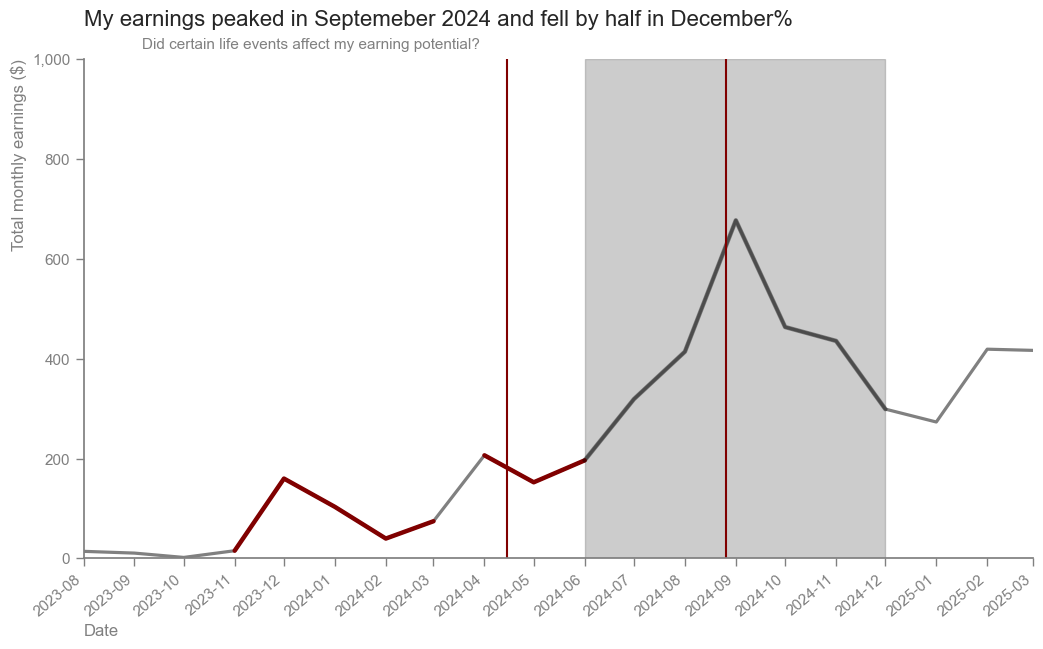

In [81]:
# Create the base relplot
g = sns.relplot(
    data=df_plot, 
    x="date", 
    y="earnings", 
    kind="line", 
    linewidth=2.3, 
    color="grey"
)

# Get axis from FacetGrid
ax = g.ax

# Adjust size
g.figure.set_size_inches(12, 6)

# Set monthly ticks and format
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=40, ha="right")

# Y-axis settings
ax.set_ylim(0, 1000)
ax.tick_params(axis="x", colors="grey", width=1)
ax.tick_params(axis="y", colors="grey", width=1)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Axis spine color
for spine in ax.spines.values():
    spine.set_color("grey")

# Titles & labels
plt.title("My earnings peaked in Septemeber 2024 and fell by half in December%", loc="left", size=16, y=1.05)
plt.xlabel("Date", loc="left",color="grey")
plt.ylabel("Total monthly earnings ($)", loc="top", color="grey")
plt.suptitle("Did certain life events affect my earning potential?", y = 1, x = 0.344, size = 11, color="grey")

# Remove whitespace
ax.margins(x=0)

person_one = df_plot[
    (df_plot["date"] >= "2023-10-30") & 
    (df_plot["date"] <= "2024-3-01")
]

person_two = df_plot[
    (df_plot["date"] >= "2024-04-01") & 
    (df_plot["date"] <= "2024-06-04")
]



sns.lineplot(
    data=person_two,
    x="date",
    y="earnings",
    ax=ax,               # <- THIS is the key to plot on the same chart
    color="maroon",
    linewidth=3.2,
)


sns.lineplot(
    data=person_one,
    x="date",
    y="earnings",
    ax=ax,               # <- THIS is the key to plot on the same chart
    color="maroon",
    linewidth=3.2,
)


# Turn on the ticks for both x and y axes
ax.tick_params(axis='both', which='both', bottom=True, left=True)



# === HIGHLIGHT SEGMENT ON SAME AXIS ===
highlight = df_plot[
    (df_plot["date"] >= "2024-06-01") & 
    (df_plot["date"] <= "2024-12-01")
]

sns.lineplot(
    data=highlight,
    x="date",
    y="earnings",
    ax=ax,               # <- THIS is the key to plot on the same chart
    color="black",
    linewidth=3.2,
    alpha=0.4
)



# plt.axvspan(dt.datetime(2024,4,16), dt.datetime(2024,6,4), color = "maroon", alpha = 0.4)
# plt.axvspan(dt.datetime(2024,6,11), dt.datetime(2024,6,26), color = "maroon", alpha = 0.4)

plt.axvspan(dt.datetime(2024,6,1), dt.datetime(2024,12,1), color = "grey", alpha = 0.4)

plt.axvline(dt.datetime(2024,8,26), color="maroon")
plt.axvline(dt.datetime(2024,4,15), color="maroon")

plt.show()

In December 2024, many Medium writers, including myself, observed a noticeable decline in earnings. Several factors during that period may have contributed to this trend:​

1. Algorithm and Policy Updates:

    Medium implemented changes aimed at enhancing content personalization and combating inauthentic activities. While these updates were designed to improve user experience, they inadvertently affected content visibility and, consequently, writer earnings. ​

2. Increased Competition:

    The platform experienced an influx of new writers, intensifying competition for reader attention. This surge made it more challenging for individual articles to gain traction, impacting overall earnings for many. ​

3. Seasonal Engagement Fluctuations:

    The holiday season often brings shifts in certain markets, especially the post-holiday season. Many people are away visiting family and are likely not as engaged in certain online activities. Some writers reported a decline in reader interactions during December, which could have contributed to reduced earnings. ​

It's important to note that while these factors affected many, individual experiences varied. Some writers continued to see growth, suggesting that content strategy and audience engagement played significant roles during this period. ​

Understanding these dynamics can help in strategizing for future content creation and adapting to platform changes.

Between November 2023 and September 2024, my Medium earnings traced a familiar arc: a spike, a crash, a climb, and then a slow unraveling. What makes this arc compelling isn’t just the numbers—it’s how closely they mirror the emotional and structural shifts in my life.

I started dating someone in early November. Almost immediately, there was a small spike in earnings. In December—while still in that relationship—my income peaked. But the crash came swiftly. From January through February, earnings plummeted. We broke up mid-February, but the final emotional cutoff happened in early March. That’s when earnings began to climb again.

The emotional release of ending a draining relationship may have cleared cognitive and creative space. But I hesitate to attribute too much weight to that. After all, March earnings reflect work and visibility accumulated over the month. I didn’t wake up “free” and suddenly write better. Still, the correlation is hard to ignore—particularly when considering that I was single from mid-February to mid-April, a time when I had fewer interpersonal obligations and more bandwidth for introspection and writing.

Then came someone else. 

We dated from April 16 to June 4. During that time, earnings continued their upward trajectory, peaking around September. At first glance, it might look like dating helped—but I suspect it’s more complex. I was already in a rhythm, and the upward curve had already begun. More likely, what I was seeing was momentum.

In late August, I started a new job. By December, my earnings had fallen off a cliff. Many Medium writers reported similar slumps, which suggests a larger platform issue. But from my side, there’s another truth: I had less creative capacity. Less emotional space. Less time to let ideas ripen.

So was it dating? Was it momentum? Was it emotional drainage or professional transition? The truth is, I can’t say definitively. But the timing matters—not because I want to force causation, but because relationship dynamics, emotional availability, and energy allocation all live in the same house as creativity. And when you write about relationships for a living, your personal life isn’t just background—it’s data.

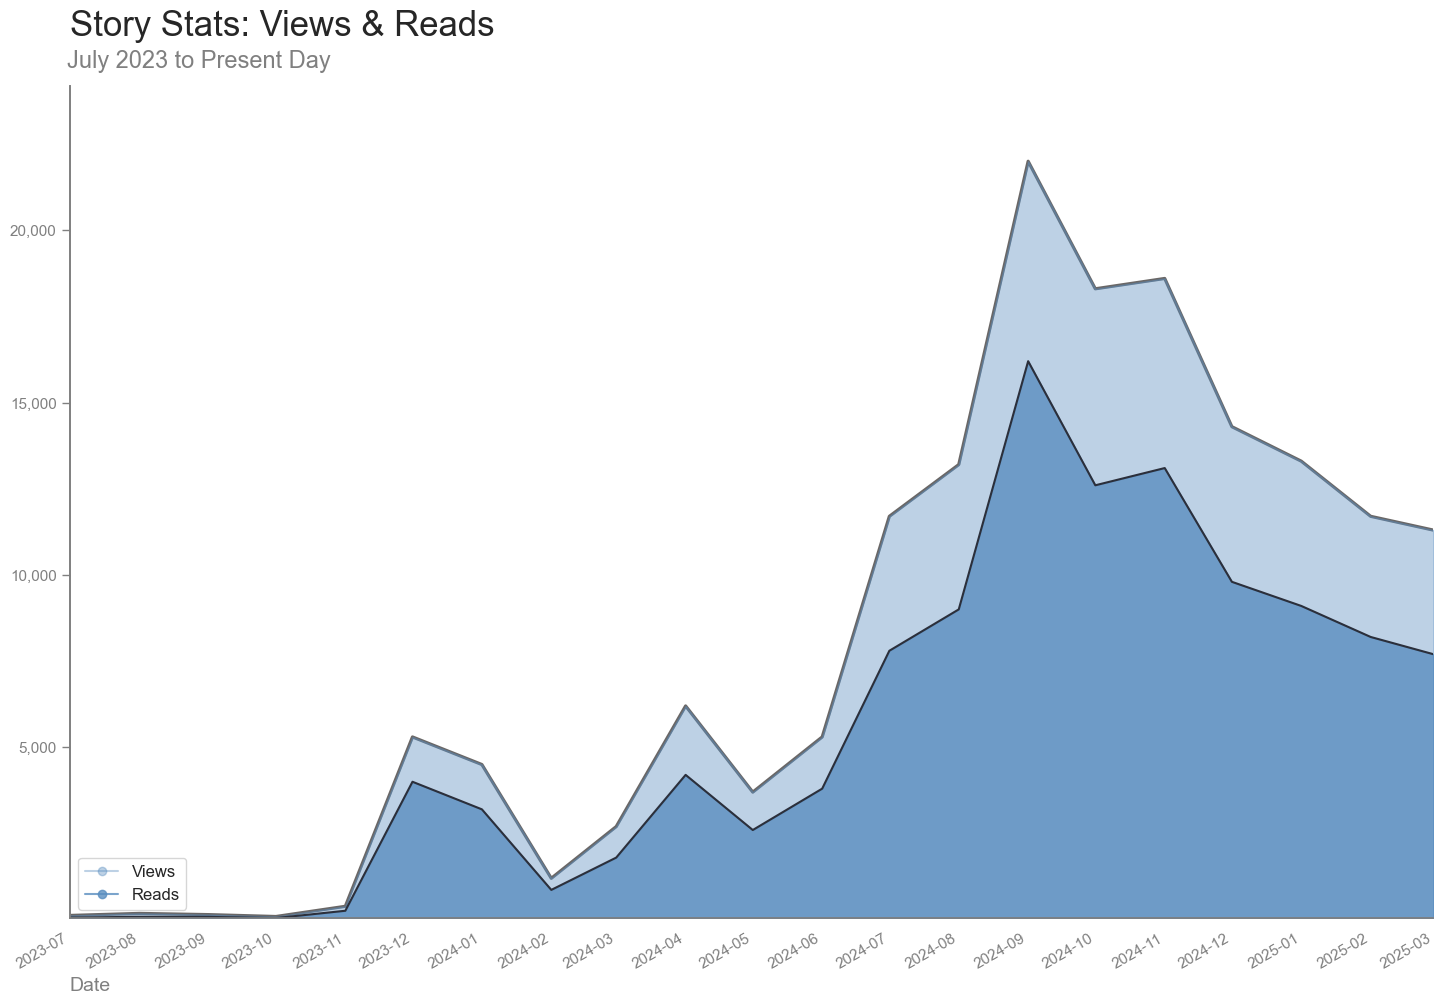

In [16]:

# Make sure data is sorted by date (important for time series)
df_plot = df_plot.sort_values(by='date')

# Create the relplot (VIEWS)
g = sns.relplot(
    data=df_plot, 
    x="date", 
    y="views", 
    kind="line", 
    label="Views", 
    linewidth=2.3, 
    color="#6a6766",
    )

# Set figure size after plot creation
g.figure.set_size_inches(18, 10)

# Access the axes
ax = g.axes[0, 0]

# Set x-axis ticks for each month
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Display every month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as "YYYY-MM"

# Rotate x-axis labels for readability
plt.xticks(rotation=30, ha="right")

# Create twin axes for the second y-axis
ax2 = ax.twinx()

# Remove y-axis tick labels
ax2.set(yticklabels=[])

# Remove y-axis tick labels
ax2.set(yticks=[])

# Set y-axis limits to be the same for both axes
views_min, views_max = df_plot["views"].min(), df_plot["views"].max()
reads_min, reads_max = df_plot["reads"].min(), df_plot["reads"].max()

# Set the y-axis limits to match
y_min = min(views_min, reads_min)
y_max = max(views_max, reads_max)

# Add a buffer to the y_max to provide space above the highest value
buffer = (y_max - y_min) * 0.1  # 10% buffer for example
y_max += buffer

# Apply the same limits to both axes
ax.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)


# Remove the top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

ax2.fill_between(df_plot["date"],  df_plot["views"], alpha=0.4, color = "#5a8ec0")

ax2.fill_between(df_plot["date"],  df_plot["reads"], alpha=0.8, color = "#5a8ec0")


# Set color of spines to grey for both axes
for spine in ax.spines.values():
    spine.set_color("grey")

for spine in ax2.spines.values():
    spine.set_color("grey")


# Change x-axis tick color
ax.tick_params(axis="x", colors="grey", width=1)

# Change y-axis tick color
ax.tick_params(axis="y", colors="grey", width=1)


# Removes beginning and trailing whitespace
ax.margins(x=0)

plt.title("Medium Earnings Over Time (2023 - Present)", loc="left")
plt.xlabel("Date")

# Label the left y-axis explicitly
ax.set_ylabel("") # Clear the label for the first y-axis

ax2.set_ylabel("")  # Clear the label for the second y-axis



plt.title("Story Stats: Views & Reads", fontsize=25, loc="left", y=1.05)
plt.suptitle("July 2023 to Present Day", y = 1, x = 0.26, size = 17, color = "grey")


# Plot the second time series (READS)
sns.lineplot(
    data=df_plot, 
    x="date", 
    y="reads", 
    ax=ax2, 
    color="#2b2f3b", 
)

# Fill-between doesn’t auto-label, so add dummy lines for legend
ax2.plot([], [], color="#5a8ec0", marker = "o", alpha=0.4, label="Views")
ax2.plot([], [], color="#5a8ec0", marker="o", alpha=0.8, label="Reads")

# Add legend
ax2.legend(loc="lower left", fontsize=12)

ax.set_xlabel("Date", fontsize=14, color="grey", loc="left")

ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()


Quick note about this graph: earnings aren't calculated until the end of each month and distributed in the following month.
For example, earnings for september are still generating until the very last day of that month at 23:59 hours. 
Thus, earnings for September are distributed by October 8th to the 10th.

Views and Reads from 2023 to 2025

### 1.4 Rolling Change in Earnings

* Calculate month-over-month percentage change
* Rolling average for trend smoothing

In [17]:

df_plot["rolling_pct_change"] = round(df_plot["earnings"].pct_change(fill_method=None) * 100, 2)

In [18]:
round(df_plot["views_reads_discrepency"].pct_change(fill_method=None) * 100, 2)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7      58.06
8     -32.65
9     -31.82
10    186.67
11    907.75
12      0.00
13    -74.08
14    167.06
15    122.22
16    -45.00
17     36.36
18    160.00
19      7.69
20     38.10
21     -1.72
22     -3.51
23    -18.18
24     -6.67
25    -16.67
26      2.86
27       NaN
28       NaN
29       NaN
30       NaN
31       NaN
32       NaN
33       NaN
34       NaN
35       NaN
Name: views_reads_discrepency, dtype: float64

In [19]:
# all the months with rolling percent change data
df_plot[8:27]

,year,month,earnings,followers,follower_gain(change),email_subscribers,views,reads,number_articles,avg_earnings_per_article,avg_read_ratio,average_article_length(minutes),views_reads_discrepency,date,rolling_pct_change
8,2023,September,10.71,108.0,27.0,NaN,146.0,80.0,13.0,0.82,54.79,4.66,66.0,2023-09-01,-24.84
9,2023,October,2.04,137.0,29.0,3.0,91.0,46.0,13.0,0.16,50.55,4.53,45.0,2023-10-01,-80.95
10,2023,November,15.48,178.0,41.0,3.0,387.0,258.0,11.0,1.41,66.67,4.40,129.0,2023-11-01,658.82
11,2023,December,159.91,244.0,66.0,5.0,5300.0,4000.0,16.0,9.99,75.47,4.33,1300.0,2023-12-01,933.01
12,2024,January,103.26,309.0,65.0,3.0,4500.0,3200.0,15.0,6.88,71.11,5.60,1300.0,2024-01-01,-35.43
13,2024,February,39.82,358.0,49.0,4.0,1200.0,863.0,10.0,3.98,71.92,6.00,337.0,2024-02-01,-61.44
14,2024,March,74.53,384.0,26.0,5.0,2700.0,1800.0,19.0,3.92,66.67,5.00,900.0,2024-03-01,87.17
15,2024,April,206.51,472.0,88.0,9.0,6200.0,4200.0,15.0,13.77,67.74,6.92,2000.0,2024-04-01,177.08
16,2024,May,152.47,539.0,67.0,11.0,3700.0,2600.0,15.0,10.16,70.27,6.06,1100.0,2024-05-01,-26.17
17,2024,June,196.38,643.0,104.0,15.0,5300.0,3800.0,16.0,12.27,71.70,6.50,1500.0,2024-06-01,28.80


##### Website Traffic or Engagement (Medium views/reads)

* **10–20%** monthly growth is often a solid benchmark.
* If we're early, 30%+ MoM can happen (but it's rarely sustainable).
* Even flat traffic can be okay if we're improving quality/conversion.

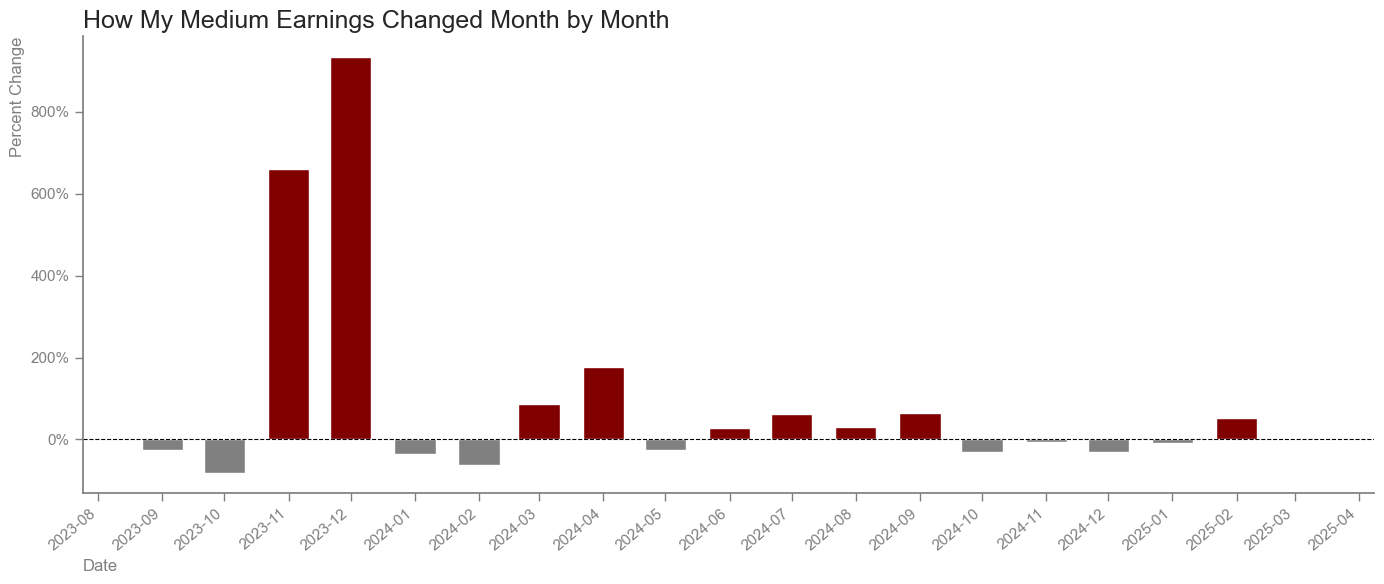

In [75]:
plt.figure(figsize=(14, 6))
ax = plt.gca()

# Apply a boolean mask for date filtering
mask = (df_plot["date"] >= "2023-09-01") & (df_plot["date"] <= "2025-03-01")
filtered_df = df_plot[mask]

# Bar chart of % change
ax.bar(
    filtered_df["date"],  # Use the filtered date column
    filtered_df["rolling_pct_change"], 
    color=["maroon" if val >= 0 else "grey" for val in filtered_df["rolling_pct_change"]],
    width=20  # Adjust width if needed
)

# Format date x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

# Rotate x-ticks for better readability
plt.xticks(rotation=40, ha="right")

# Y-axis as percent
ax.yaxis.set_major_formatter(PercentFormatter())

# Optional line at 0% for reference
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")


# Turn on the ticks for both x and y axes
ax.tick_params(axis='both', which='both', bottom=True, left=True)

# Set color of spines to grey for both axes
for spine in ax.spines.values():
    spine.set_color("grey")

# Remove the top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Change x-axis tick color
ax.tick_params(axis="x", colors="grey", width=1)

# Change y-axis tick color
ax.tick_params(axis="y", colors="grey", width=1)

# Labels and title
plt.title("How My Medium Earnings Changed Month by Month", loc="left", size=18)
plt.xlabel("Date", loc="left", color="grey")
plt.ylabel("Percent Change", loc="top", color="grey")

plt.tight_layout()
plt.show()


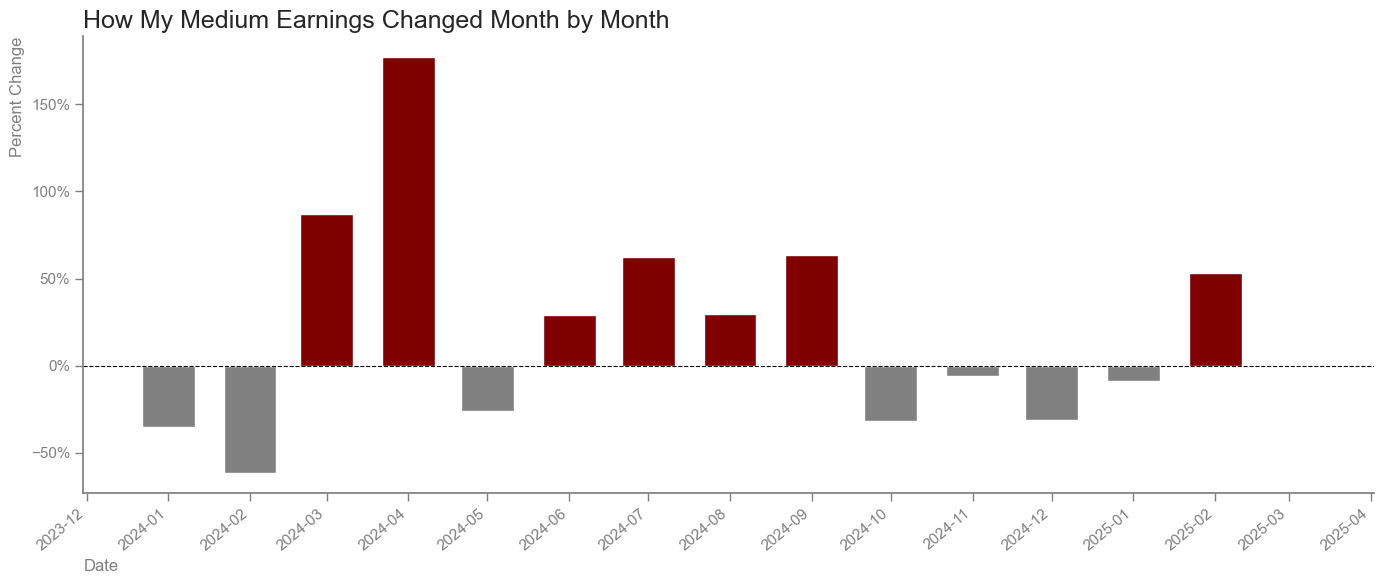

In [77]:
plt.figure(figsize=(14, 6))
ax = plt.gca()

# Apply a boolean mask for date filtering
mask = (df_plot["date"] >= "2024-01-01") & (df_plot["date"] <= "2025-03-01")
filtered_df = df_plot[mask]

# Bar chart of % change
ax.bar(
    filtered_df["date"],  # Use the filtered date column
    filtered_df["rolling_pct_change"], 
    color=["maroon" if val >= 0 else "grey" for val in filtered_df["rolling_pct_change"]],
    width=20  # Adjust width if needed
)

# Format date x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

# Rotate x-ticks for better readability
plt.xticks(rotation=40, ha="right")

# Y-axis as percent
ax.yaxis.set_major_formatter(PercentFormatter())

# Optional line at 0% for reference
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")


# Turn on the ticks for both x and y axes
ax.tick_params(axis='both', which='both', bottom=True, left=True)

# Set color of spines to grey for both axes
for spine in ax.spines.values():
    spine.set_color("grey")

# Remove the top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Change x-axis tick color
ax.tick_params(axis="x", colors="grey", width=1)

# Change y-axis tick color
ax.tick_params(axis="y", colors="grey", width=1)

# Labels and title
plt.title("How My Medium Earnings Changed Month by Month", loc="left", size=18)
plt.xlabel("Date", loc="left", color="grey")
plt.ylabel("Percent Change", loc="top", color="grey")

plt.tight_layout()
plt.show()


Discrepancy Between Views and Reads: Lost Opportunity?

When analyzing the difference between views and reads, we can consider the discrepancy as a form of "lost opportunity." This means you're measuring how many views are not being converted into reads, essentially missing out on engagement. However, it’s important to remember that a smaller discrepancy doesn’t always equate to better performance. Here's why:
Example:

    Small Discrepancy (2000 views, 1500 reads):
    The discrepancy is only 500 views, but you’re not doing well overall. Even though your view-to-read ratio seems favorable, you’re still not reaching significant numbers. A discrepancy of just 500 views is a small win, but the total number of views is still very low, meaning your content is not reaching a larger audience or generating much engagement. You’re not making money.

    Large Discrepancy (150,000 views, 130,000 reads):
    Here, the discrepancy is 20,000 views, but the numbers are much larger, and that can be good. With 150,000 views and 130,000 reads, you have a solid audience and high engagement, meaning the reach is wide and the audience is engaged. In this case, even though the discrepancy is higher, you’re likely generating significant revenue or growth. That equals money.

Key Insight:

    Smaller discrepancy isn’t always better: A smaller difference between views and reads can give the illusion of better performance, but if your overall views are low, you're still not maximizing potential.

    Larger discrepancy can still be good: High overall views and reads mean more people are seeing and interacting with your content. Even with a larger discrepancy, this can indicate a successful campaign or content strategy.

# Feature Scaling for Comparative Analysis

To analyze trends and relationships between different metrics in our dataset, we can apply **feature scaling** to bring all values to a similar range. This allows us to plot multiple features on the same graph and visually compare how they fluctuate over time.

## Why Feature Scaling?

Different features have different ranges and units. For example:
- `average_article_length(minutes)` may range from **3 to 10 minutes**.
- `email_subscribers` could be in the **hundreds or thousands**.
- `earnings` might range from **a few dollars to hundreds**.
- `follower_gain (change)` may vary widely month-to-month.
- `avg_read_ratio` is a percentage (0 to 1 scale).

Without scaling, some features would dominate the graph, making it difficult to see patterns across all variables.

## Methods of Feature Scaling

### 1. **Min-Max Scaling**
Transforms values to a **0-1 range**:
\[
X' = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
\]
This is useful when we want all features to have the same range without distorting relationships.

### 2. **Standardization (Z-score Normalization)**
Converts values to have a **mean of 0 and a standard deviation of 1**:
\[
X' = \frac{X - \mu}{\sigma}
\]
This is useful for normalizing distributions and making comparisons easier.

## Features to Compare
We propose scaling and superimposing the following features:
- `average_article_length(minutes)`
- `email_subscribers`
- `earnings`
- `follower_gain (change)`
- `avg_read_ratio`

By applying Min-Max Scaling or Standardization, we can plot all these features on the same graph to identify correlations and trends.

## Next Steps
1. Apply feature scaling to the dataset.
2. Visualize the scaled features on a single plot.
3. Analyze whether certain features rise and fall together, indicating potential relationships.

This approach will help uncover deeper insights into Medium earnings and engagement dynamics.

